In [54]:
import pandas as pd
import os
import functools as ft
from sklearn.preprocessing import minmax_scale

# Define the path where input data is stored
data_path = 'dist'


if not os.path.exists(data_path):
    os.makedirs(data_path)

# Initialize a list to hold DataFrames loaded from each Parquet file
out_data = []

# Iterate over every file in the data_path directory
for var in os.listdir(data_path):
    # Process only Parquet files
    if var.endswith('.parquet'):
        # Load the Parquet file as a DataFrame and reset its index
        df = pd.read_parquet(os.path.join(data_path, var)).reset_index()
        
        # Convert 'year' and 'quarter' columns to integers, if they exist
        if 'year' in df.columns:
            df['year'] = df['year'].astype(int)
        if 'quarter' in df.columns:
            df['quarter'] = df['quarter'].astype(int)
        
        # Remove the 'index' column, if present, after resetting index
        if 'index' in df.columns:
            df.drop(columns=['index'], inplace=True)
        
        # Debug: Print all column names to verify if indicator columns are present
        print(f"All columns in {var}: {df.columns.tolist()}")

        

        # Log processing information
        print(f"Processing file: {var}")        
        print(f"Shape: {df.shape}")
        print(f"Columns: {df.columns}")
        
        # Add the processed DataFrame to the list
        out_data.append(df)
    else:
        # Log files that are not Parquet files
        print(f"Ignoring non-Parquet file: {var}")

# Concatenate all DataFrames in the list to create a single DataFrame
out_df = pd.concat(out_data, ignore_index=True)
print("Aggregated the DataFrames")

# Merge all DataFrames in the list on 'pgid', 'year', and 'quarter' using an outer join
# This step seems redundant with the concatenation above and might be omitted based on requirements
df_norm = ft.reduce(lambda left, right: pd.merge(
    left, right, 
    on=['pgid', 'year', 'quarter'], 
    how='outer', 
    suffixes=('', '_right')), out_data)  # '_right' will be appended to the columns of the right DataFrame.


# Fill NA/NaN values with 0 in the final DataFrame
df_norm = df_norm.fillna(0)


All columns in CLI_current_heavy-precipitation_raw_processed.parquet: ['pgid', 'year', 'quarter', 'lat', 'lon', 'CLI_current_heavy-precipitation_raw_normalized']
Processing file: CLI_current_heavy-precipitation_raw_processed.parquet
Shape: (6102350, 6)
Columns: Index(['pgid', 'year', 'quarter', 'lat', 'lon',
       'CLI_current_heavy-precipitation_raw_normalized'],
      dtype='object')
All columns in CLI_current_drought_raw_processed.parquet: ['pgid', 'year', 'quarter', 'lat', 'lon', 'CLI_current_drought_raw_normalized']
Processing file: CLI_current_drought_raw_processed.parquet
Shape: (6102350, 6)
Columns: Index(['pgid', 'year', 'quarter', 'lat', 'lon',
       'CLI_current_drought_raw_normalized'],
      dtype='object')
All columns in CLI_accumulated_heatwave_raw_processed.parquet: ['pgid', 'year', 'quarter', 'lat', 'lon', 'CLI_accumulated_heatwave_raw_normalized']
Processing file: CLI_accumulated_heatwave_raw_processed.parquet
Shape: (6102350, 6)
Columns: Index(['pgid', 'year', 'qua

In [24]:
import os
import pandas as pd


# Define the output path for normalized data
data_path_output_normalized = "/"

if not os.path.exists(data_path_output_normalized):
    os.makedirs(data_path_output_normalized)

# Define the columns to check for zeros
check_accumulated_cols = [col for col in df_norm.columns if "accumulated" in col]
check_current_cols = [col for col in df_norm.columns if "current" in col]

# Separate "accumulated" indicators and remove rows where all specific columns are zeros
accumulated_df = df_norm[['pgid', 'year', 'quarter', 'lat', 'lon'] + check_accumulated_cols]
accumulated_df = accumulated_df.loc[~(accumulated_df[check_accumulated_cols] == 0).all(axis=1)]

# Separate "current" indicators and remove rows where all specific columns are zeros
current_df = df_norm[['pgid', 'year', 'quarter', 'lat', 'lon'] + check_current_cols]
current_df = current_df.loc[~(current_df[check_current_cols] == 0).all(axis=1)]

# Save them to Parquet
accumulated_df.to_parquet(os.path.join(data_path_output_normalized, "accumulated_indicators.parquet"))
current_df.to_parquet(os.path.join(data_path_output_normalized, "current_indicators.parquet"))

print("Separated and saved 'accumulated' and 'current' DataFrames with non-zero checks.")


Separated and saved 'accumulated' and 'current' DataFrames with non-zero checks.


In [25]:
accumulated_df.head(40)

pgid  year  quarter    lat     lon  \
0   84117  2023        4 -31.75  118.25   
1   84117  2023        3 -31.75  118.25   
2   84117  2023        2 -31.75  118.25   
3   84117  2023        1 -31.75  118.25   
4   84117  2022        4 -31.75  118.25   
5   84117  2022        3 -31.75  118.25   
6   84117  2022        2 -31.75  118.25   
7   84117  2022        1 -31.75  118.25   
8   84117  2021        4 -31.75  118.25   
9   84117  2021        3 -31.75  118.25   
10  84117  2021        2 -31.75  118.25   
11  84117  2020        1 -31.75  118.25   
12  84117  2020        2 -31.75  118.25   
13  84117  2020        3 -31.75  118.25   
14  84117  2020        4 -31.75  118.25   
15  84117  2021        1 -31.75  118.25   
16  84117  2010        1 -31.75  118.25   
17  84117  2010        2 -31.75  118.25   
18  84117  2010        3 -31.75  118.25   
19  84117  2010        4 -31.75  118.25   
20  84117  2011        1 -31.75  118.25   
21  84117  2011        2 -31.75  118.25   
22  84117  2011        3 -31.75  118.25   
23  84117  2011        4 -31.75  118.25   
24  84117  2012        1 -31.75  118.25   
25  84117  2012        2 -31.75  118.25   
26  84117  2012        3 -31.75  118.25   
27  84117  2012        4 -31.75  118.25   
28  84117  2013        1 -31.75  118.25   
29  84117  2013        2 -31.75  118.25   
30  84117  2013        3 -31.75  118.25   
31  84117  2013        4 -31.75  118.25   
32  84117  2014        1 -31.75  118.25   
33  84117  2014        2 -31.75  118.25   
34  84117  2014        3 -31.75  118.25   
35  84117  2014        4 -31.75  118.25   
36  84117  2015        1 -31.75  118.25   
37  84117  2015        2 -31.75  118.25   
38  84117  2015        3 -31.75  118.25   
39  84117  2015        4 -31.75  118.25   

    CLI_accumulated_heatwave_raw_normalized  \
0                                  0.095865   
1                                  0.088346   
2                                  0.075188   
3                                  0.075188   
4                                  0.078008   
5                                  0.083647   
6                                  0.085526   
7                                  0.087406   
8                                  0.090226   
9                                  0.087406   
10                                 0.087406   
11                                 0.081767   
12                                 0.089286   
13                                 0.089286   
14                                 0.081767   
15                                 0.084586   
16                                 0.040414   
17                                 0.038534   
18                                 0.045113   
19                                 0.045113   
20                                 0.048872   
21                                 0.048872   
22                                 0.048872   
23                                 0.048872   
24                                 0.042293   
25                                 0.045113   
26                                 0.050752   
27                                 0.050752   
28                                 0.053571   
29                                 0.057331   
30                                 0.046992   
31                                 0.054511   
32                                 0.051692   
33                                 0.050752   
34                                 0.053571   
35                                 0.050752   
36                                 0.053571   
37                                 0.055451   
38                                 0.060150   
39                                 0.062970   

    CLI_accumulated_wildfire_raw_normalized  \
0                                  0.086270   
1                                  0.086270   
2                                  0.086270   
3                                  0.086270   
4                                  0.086270   
5                              

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

def correlations_matrix(df):
    # Exclude specific columns from the correlation analysis
    columns_to_exclude = ['pgid', 'year', 'quarter', 'lat', 'lon']
    columns_for_analysis = [col for col in df.columns if col not in columns_to_exclude]
    
    # Handle NaN values: You can choose to fill them with a value or drop them.

    df_cleaned = df[columns_for_analysis].fillna(0)

    # Compute the correlation matrices using only rows with complete cases for selected columns
    pearson_corr_matrix = df_cleaned.corr(method='pearson')
    spearman_corr_matrix = df_cleaned.corr(method='spearman')
    
    # Display the Pearson correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Pearson Correlation Matrix')
    plt.show()
    
    # Display the Spearman correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Spearman Correlation Matrix')
    plt.show()




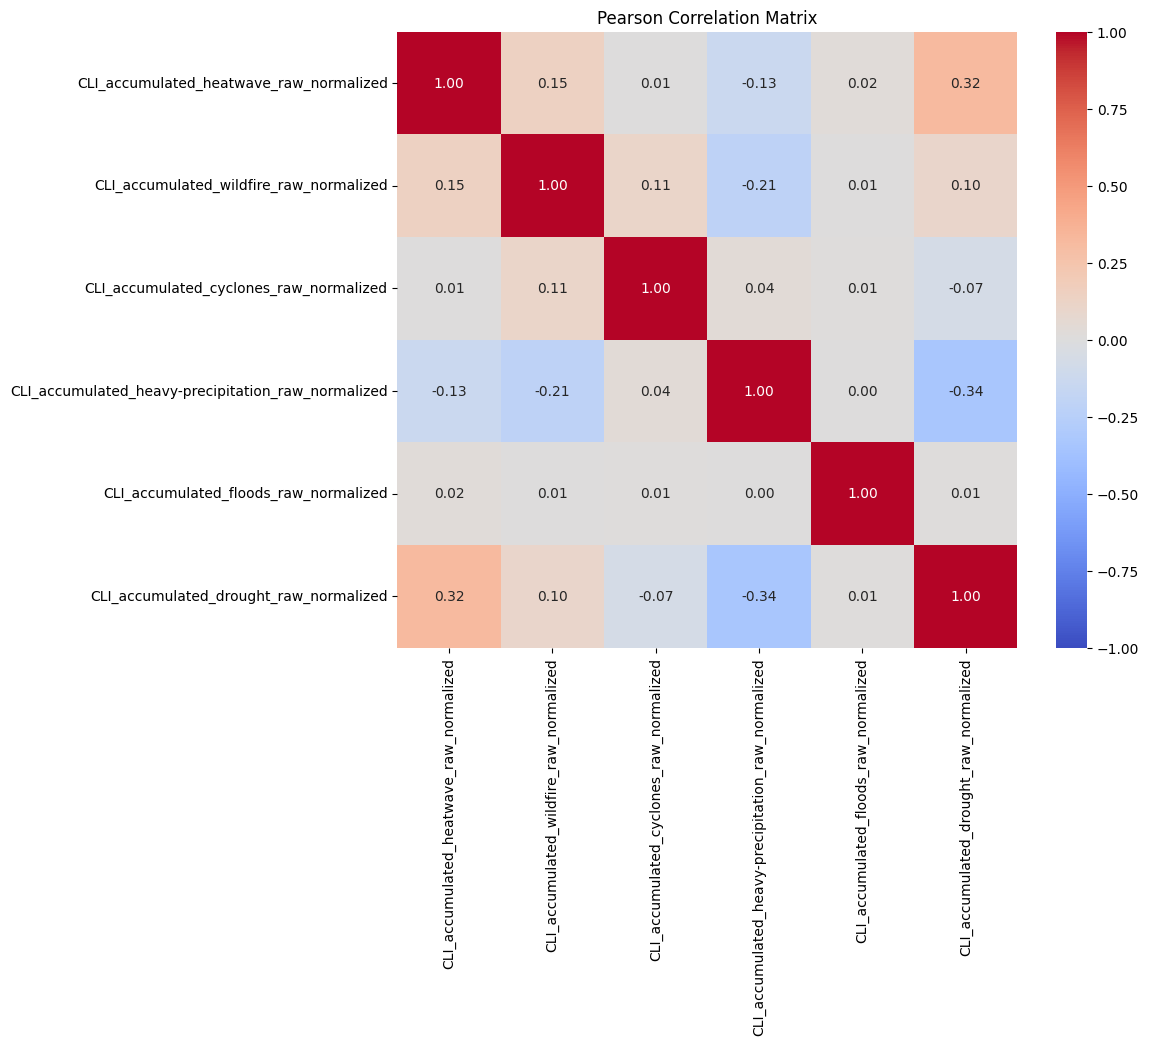

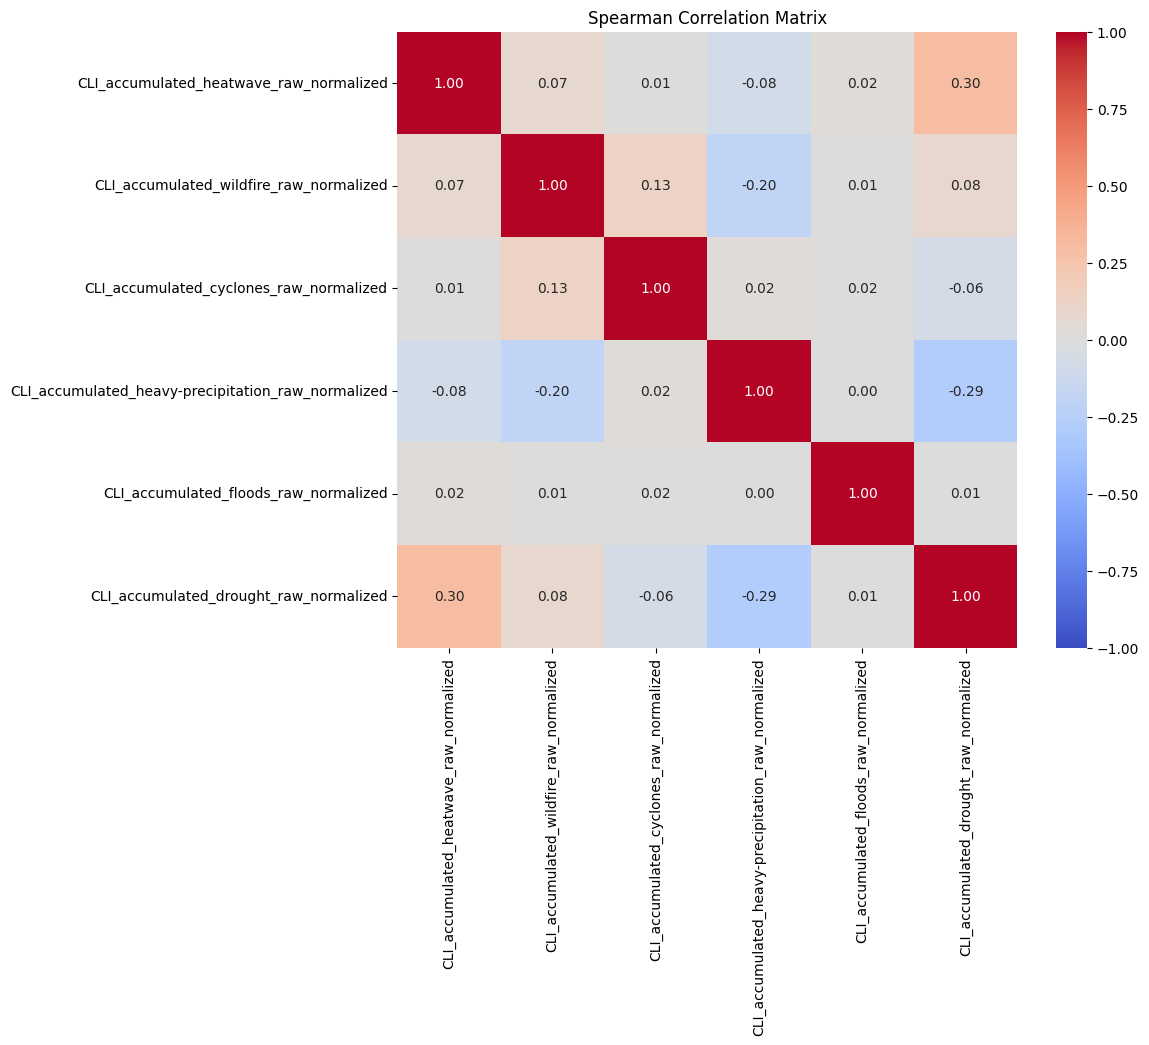

In [60]:
correlations_matrix(accumulated_df)

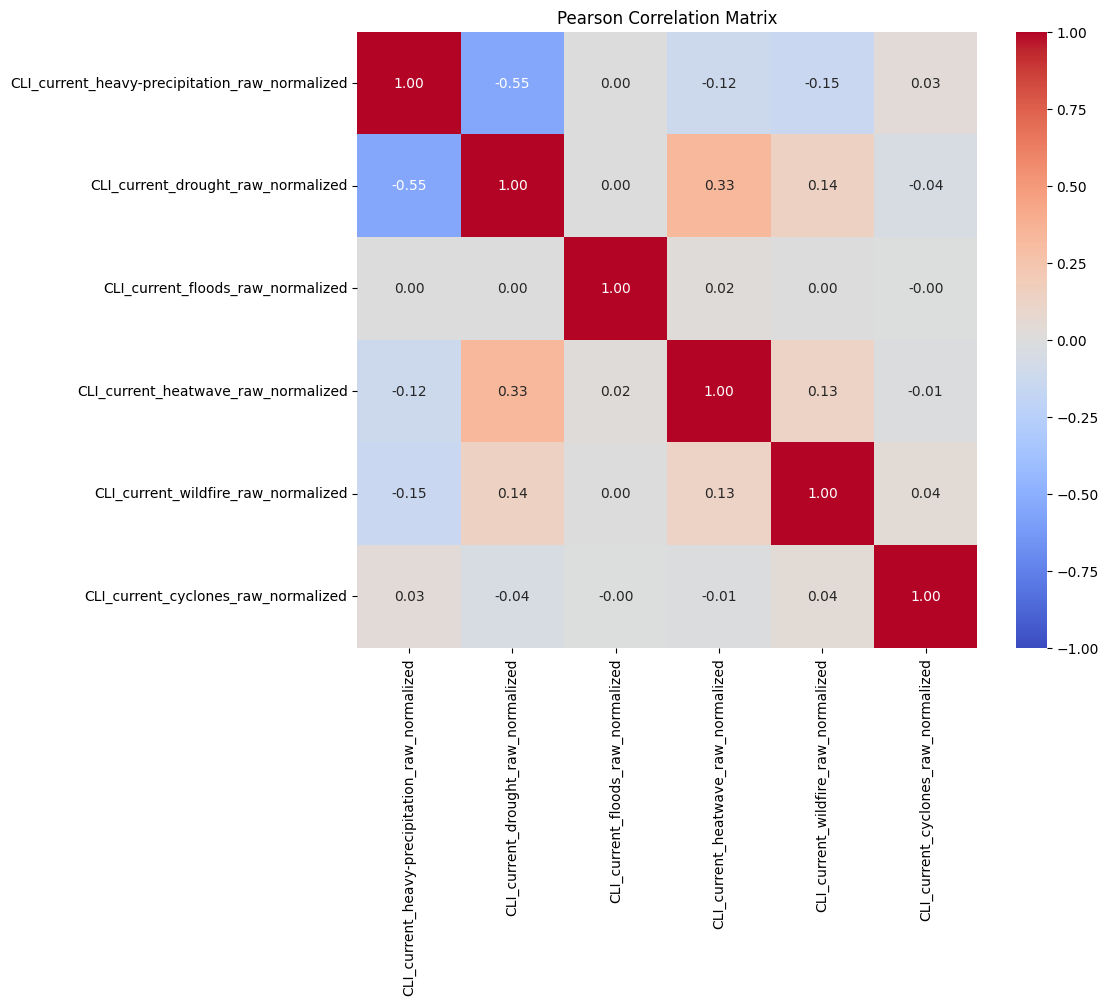

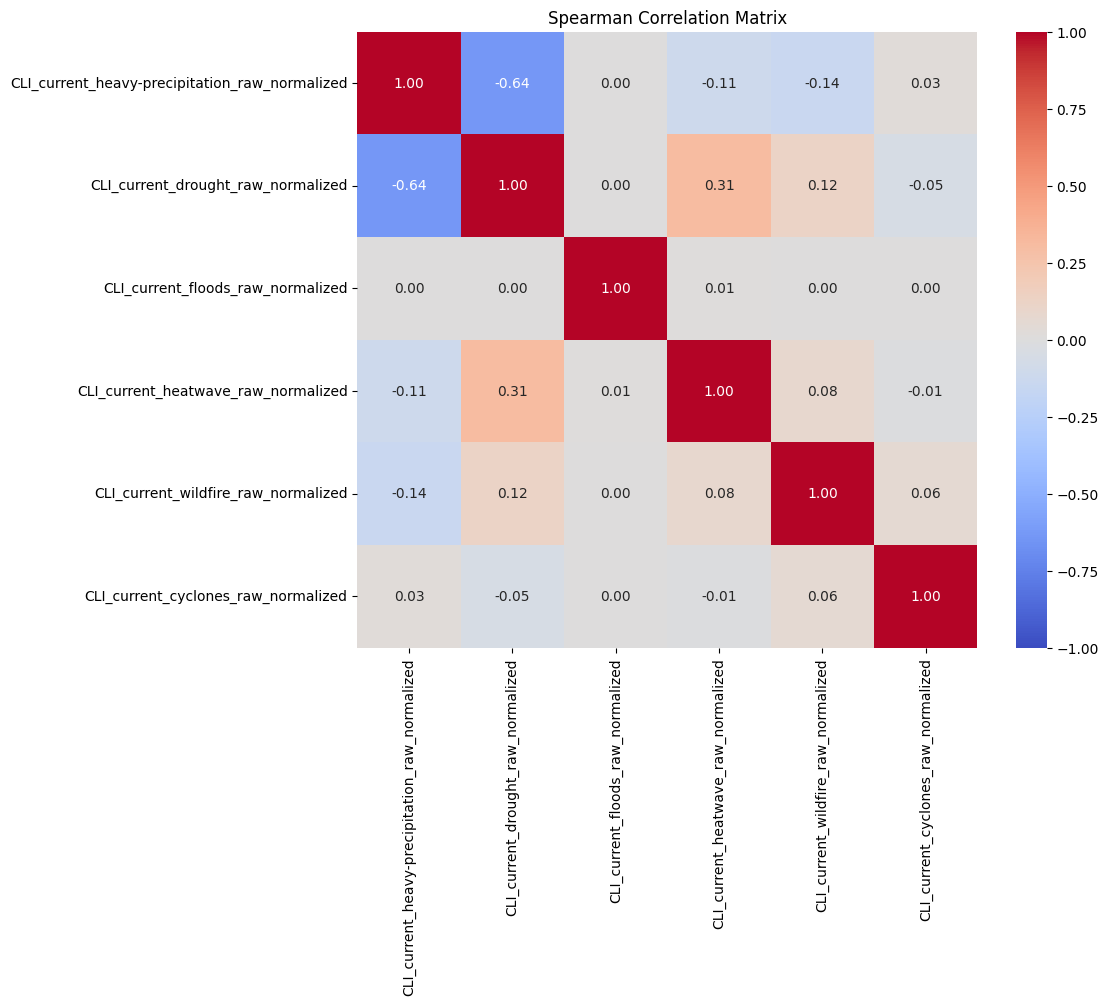

In [62]:
correlations_matrix(current_df)

In [49]:
def extract_significant_correlations(df, threshold=0.7, significance_level=0.05):
    """
    Extracts and prints pairs of significantly correlated indicators.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - threshold: Correlation coefficient threshold to consider a correlation significant.
    - significance_level: P-value threshold for statistical significance.
    
    Returns:
    - A list of tuples containing pairs of significantly correlated indicators, their correlation coefficient, and p-value.
    """
    # Exclude specific columns from the correlation analysis
    columns_to_exclude = ['pgid', 'year', 'quarter', 'lat', 'lon']
    columns_for_analysis = [col for col in df.columns if col not in columns_to_exclude]
    
    # Handle NaN values by dropping them
    df_cleaned = df[columns_for_analysis].dropna()

    # Compute the Pearson correlation matrix
    pearson_corr_matrix = df_cleaned.corr(method='pearson')
    
    significant_correlations = []
    
    # Iterate over the correlation matrix
    for i, col1 in enumerate(pearson_corr_matrix.columns):
        for j, col2 in enumerate(pearson_corr_matrix.columns):
            if i < j:  # Ensure we only look at the upper triangle of the matrix
                corr_value = pearson_corr_matrix.iloc[i, j]
                if np.abs(corr_value) > threshold:  # Check if the correlation is above the threshold
                    # Calculate the p-value
                    p_value = pearsonr(df_cleaned[col1], df_cleaned[col2])[1]
                    if p_value < significance_level:  # Check if the correlation is statistically significant
                        print(f"Significant correlation between {col1} and {col2}: Pearson's r = {corr_value:.2f}, p-value = {p_value:.3e}")
                        significant_correlations.append((col1, col2, corr_value, p_value))
    
    return significant_correlations




In [50]:

# Example usage
significant_correlations = extract_significant_correlations(accumulated_df)
significant_correlations


[]

In [51]:
significant_correlations_curr = extract_significant_correlations(current_df)
significant_correlations_curr

[]

In [1]:
#Quarterly Work

cli_columns = [col for col in df_norm.columns if col.startswith('CLI')]
columns_for_grouping = ['pgid', 'year', 'quarter', 'lat', 'lon'] + cli_columns


df_quarterly = df_norm[columns_for_grouping]

# Step 2: Group by 'pgid', 'year', and 'quarter' and calculate the mean for CLI columns
# Since 'pgid', 'year', 'quarter', 'lat', 'lon' are used for grouping, we don't calculate their mean
df_quarterly_grouped = df_quarterly.groupby(['pgid', 'year', 'quarter', 'lat', 'lon']).mean().reset_index()

# Optional: If you want to perform additional processing like scaling
# For each CLI column, apply min-max scaling
for cli_col in cli_columns:
    df_quarterly_grouped[cli_col] = minmax_scale(df_quarterly_grouped[cli_col])

# Now df_quarterly_grouped contains the quarterly values for each CLI column
print(df_quarterly_grouped.head())

# Optionally, save df_quarterly_grouped to a new parquet file if needed
output_path = 'path_to_save_df_quarterly_grouped.parquet'
df_quarterly_grouped.to_parquet(output_path)

In [ ]:


# Define the path for saving output
data_path_output_normalized_quarterly = "/directory"

# Ensure the output directory exists
if not os.path.exists(data_path_output_normalized):
    os.makedirs(data_path_output_normalized)

# Identify "accumulated" and "current" columns in df_quarterly
check_accumulated_cols = [col for col in df_quarterly.columns if "accumulated" in col]
check_current_cols = [col for col in df_quarterly.columns if "current" in col]

# Separate "accumulated" indicators and remove rows where all specific columns are zeros
accumulated_df_quarterly = df_quarterly[['pgid', 'year', 'quarter', 'lat', 'lon'] + check_accumulated_cols]
accumulated_df_quarterly = accumulated_df.loc[~(accumulated_df[check_accumulated_cols] == 0).all(axis=1)]

# Separate "current" indicators and remove rows where all specific columns are zeros
current_df_quarterly = df_quarterly[['pgid', 'year', 'quarter', 'lat', 'lon'] + check_current_cols]
current_df_quarterly = current_df.loc[~(current_df[check_current_cols] == 0).all(axis=1)]
